In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score , r2_score, mean_squared_error, mean_absolute_error

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
train_df = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r'test (1).csv')

In [4]:
train_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965


In [5]:
print(test_df.shape)
print(train_df.shape)

(36183, 12)
(54273, 13)


Data Cleaning

In [6]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [8]:
train_df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


In [9]:
#checking for any null values
train_df.isnull().sum()
null_pc = train_df.isnull().mean()*100 #checking in terms of percentage
null_pc

id              0.0
brand           0.0
model           0.0
model_year      0.0
milage          0.0
fuel_type       0.0
engine          0.0
transmission    0.0
ext_col         0.0
int_col         0.0
accident        0.0
clean_title     0.0
price           0.0
dtype: float64

In [10]:
train_df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [11]:
train_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54268    False
54269    False
54270    False
54271    False
54272    False
Length: 54273, dtype: bool

Data Cleaning process completed

Exploratory Data Analysis ( eda )

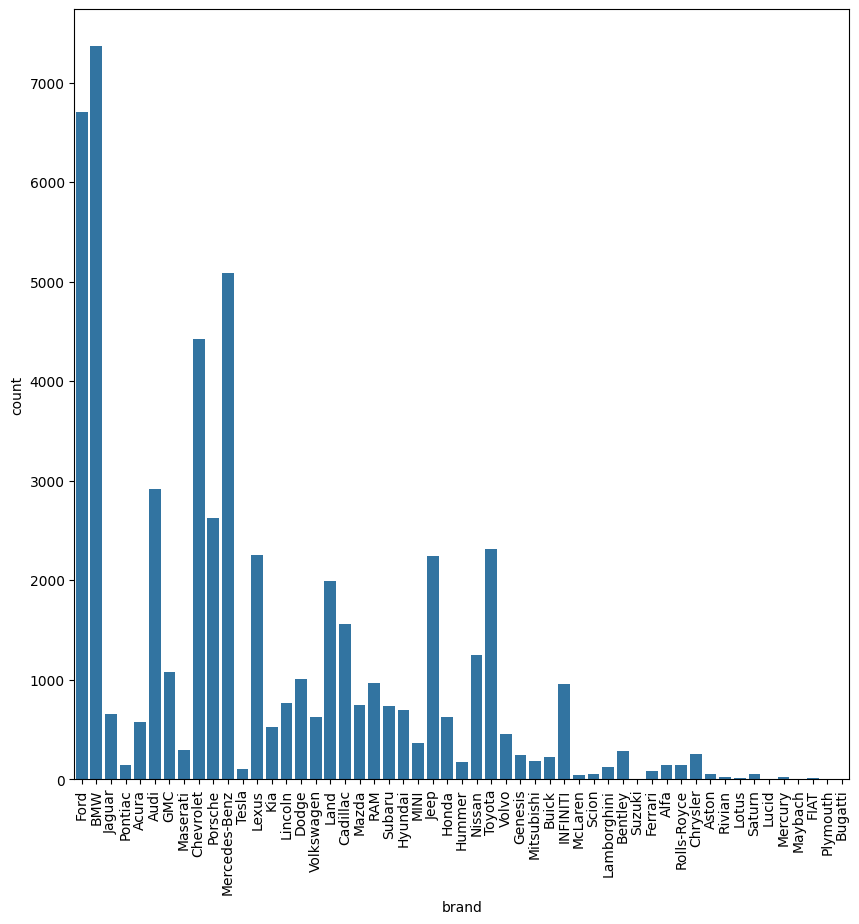

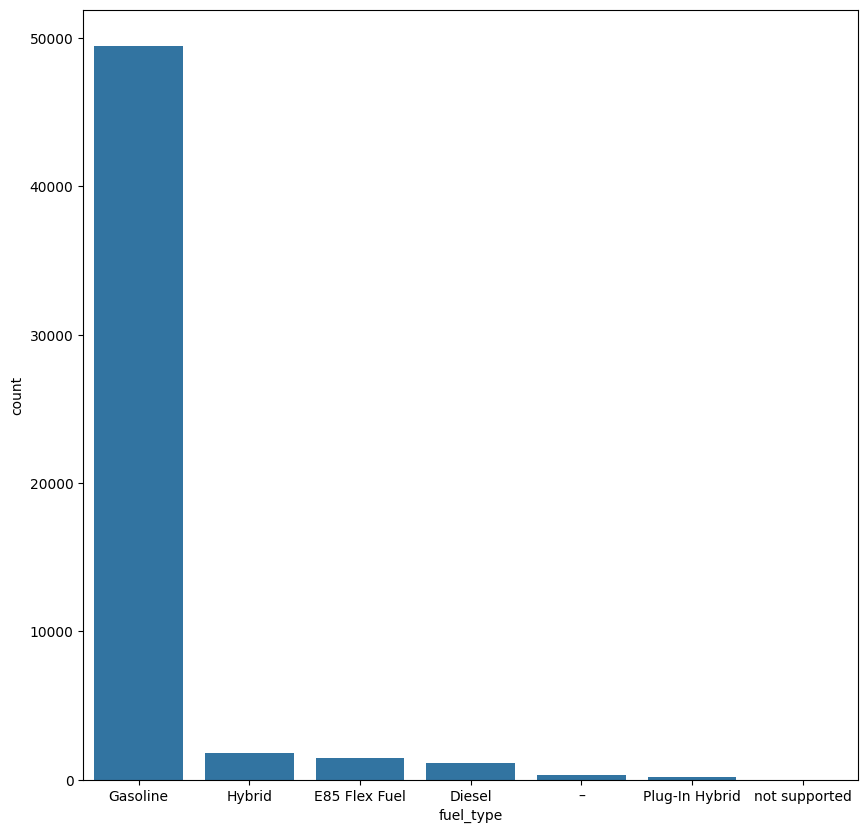

In [12]:

 #count plot for categorical columns -  fuel_type and brand
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(x='brand', data=train_df)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10,10))
sns.countplot(x='fuel_type', data=train_df)
plt.show()

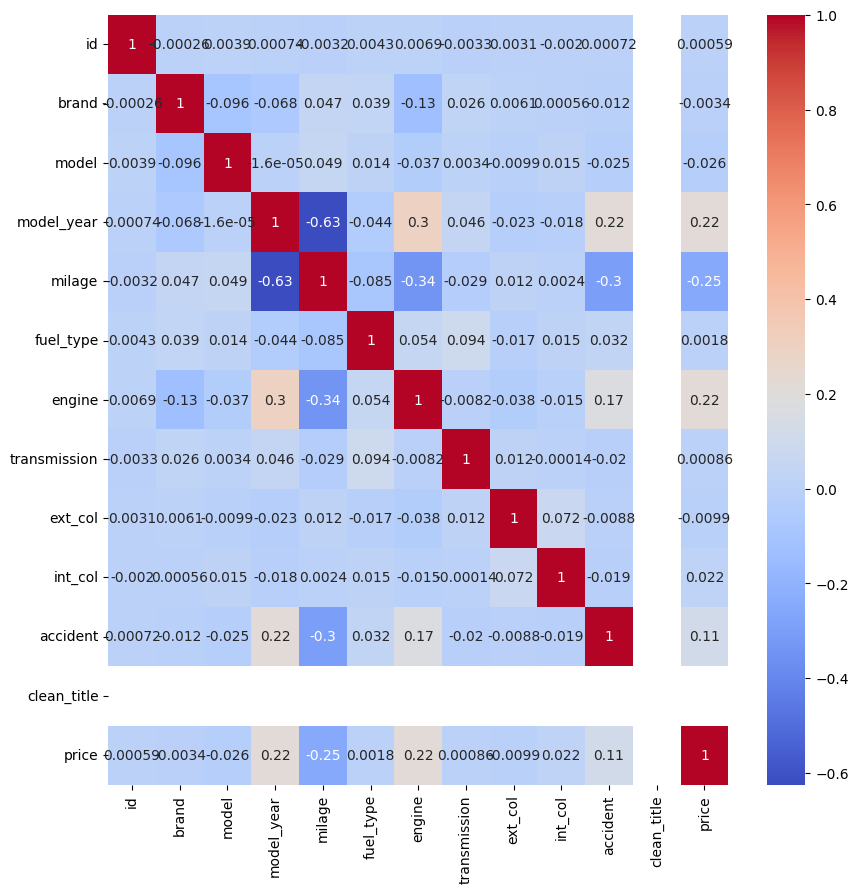

In [13]:
# As the data has a mix of categorical values and numerical values
#steps to visualize their correlation


import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

#function to calculate correlation
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def point_biserial_corr(x,y):
  return stats.pointbiserialr(x,y)[0]

# Compute the correlation matrix
def compute_correlation_matrix(train_df):
    corr_matrix = pd.DataFrame(index=train_df.columns, columns=train_df.columns)
    for col1 in train_df.columns:
        for col2 in train_df.columns:
            if train_df[col1].dtype == 'object' and train_df[col2].dtype == 'object':
                corr_matrix.loc[col1, col2] = cramers_v(train_df[col1], train_df[col2])
            elif train_df[col1].dtype != 'object' and train_df[col2].dtype != 'object':
                corr_matrix.loc[col1, col2] = train_df[col1].corr(train_df[col2])
            else:
                if train_df[col1].dtype == 'object':
                    label_encoder = LabelEncoder()
                    train_df[col1] = label_encoder.fit_transform(train_df[col1])
                if train_df[col2].dtype == 'object':
                    label_encoder = LabelEncoder()
                    train_df[col2] = label_encoder.fit_transform(train_df[col2])
                corr_matrix.loc[col1, col2] = point_biserial_corr(train_df[col1], train_df[col2])
    return corr_matrix.astype(float)


corr_matrix=compute_correlation_matrix(train_df)

#visualize correlation matrix

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [14]:
#print(test_df.shape) #removed outliers
#test_df = pd.get_dummies(test_df)
print(test_df.columns)
test_df.shape

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
      dtype='object')


(36183, 12)

In [15]:
print(train_df.columns)
train_df.shape

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')


(54273, 13)

In [16]:
from copy import deepcopy
train_df = deepcopy(train_df[['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price']])

In [17]:
train_df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,14,644,2018,74349,2,719,2,26,57,1,0,11000
1,4,49,2007,80000,2,534,18,17,9,1,0,8250
2,21,1771,2009,91491,2,541,14,181,6,1,0,15000
3,4,1748,2022,2437,3,646,43,100,24,1,0,63500
4,40,693,2001,111000,2,219,34,249,9,1,0,7850
...,...,...,...,...,...,...,...,...,...,...,...,...
54268,4,1745,2017,29000,2,856,27,249,24,1,0,29000
54269,3,165,2015,94634,1,266,14,17,9,0,0,6500
54270,41,421,2013,40989,2,817,43,249,9,0,0,18950
54271,41,142,2023,1518,2,762,29,12,24,1,0,194965


In [18]:
#converting data conversion + assigning codes

#Label Encoding


# List of columns to encode
columns_to_encode = ['brand', 'model', 'fuel_type','engine','transmission','ext_col','int_col','accident','clean_title','price']

# Apply label encoding to each column
label_encoder = LabelEncoder()
for col in columns_to_encode:
    train_df[col] = label_encoder.fit_transform(train_df[col])

print(train_df)
train_df.shape


       brand  model  model_year  milage  fuel_type  engine  transmission  \
0         14    644        2018   74349          2     719             2   
1          4     49        2007   80000          2     534            18   
2         21   1771        2009   91491          2     541            14   
3          4   1748        2022    2437          3     646            43   
4         40    693        2001  111000          2     219            34   
...      ...    ...         ...     ...        ...     ...           ...   
54268      4   1745        2017   29000          2     856            27   
54269      3    165        2015   94634          1     266            14   
54270     41    421        2013   40989          2     817            43   
54271     41    142        2023    1518          2     762            29   
54272      3    176        2021   35000          3     372            27   

       ext_col  int_col  accident  clean_title  price  
0           26       57        

(54273, 12)

In [96]:
train_df.shape

(54273, 12)

Model Training

In [19]:
from re import X
# our target column - Price

#X_train = train_df.drop(['price'], axis=1)
#y_train = train_df['price']

#X_train = train_df.to_numpy()
#y_train = train_df.to_numpy()

# Ensure indices are aligned)


NameError: name 'X_train' is not defined

In [20]:

X_train = train_df.to_numpy()[:,:-1]
y_train = train_df.to_numpy()[:,:-1]

print(X_train)
print(y_train)

[[  14  644 2018 ...   57    1    0]
 [   4   49 2007 ...    9    1    0]
 [  21 1771 2009 ...    6    1    0]
 ...
 [  41  421 2013 ...    9    0    0]
 [  41  142 2023 ...   24    1    0]
 [   3  176 2021 ...    9    1    0]]
[[  14  644 2018 ...   57    1    0]
 [   4   49 2007 ...    9    1    0]
 [  21 1771 2009 ...    6    1    0]
 ...
 [  41  421 2013 ...    9    0    0]
 [  41  142 2023 ...   24    1    0]
 [   3  176 2021 ...    9    1    0]]


In [21]:
X_train.shape


(54273, 11)

In [22]:
#split the data in training and validation sets
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
#Model Initializtion

#for prediction tasks , best suited model - Linear Regression

model = LinearRegression()

model.fit(X_train, y_train)
model

LinearRegression()

In [24]:
model.coef_

array([[ 1.00000000e+00,  1.96434320e-17, -4.26884469e-17,
        -8.73251905e-19, -2.04326929e-17,  5.49943214e-18,
        -3.73866527e-17, -8.61311028e-17,  5.87270817e-17,
         6.24888388e-17,  0.00000000e+00],
       [-1.83098394e-14,  1.00000000e+00, -1.41264658e-13,
         1.11022302e-16,  7.16748099e-15, -5.84601811e-16,
         1.62969139e-16,  2.19008839e-17,  3.25836634e-17,
        -3.03278326e-15,  0.00000000e+00],
       [-1.07572927e-16,  2.31206113e-16,  1.00000000e+00,
         4.60785923e-18,  1.47803268e-14,  1.30612057e-16,
        -4.30901148e-16,  6.43959975e-17,  2.96540660e-16,
         3.76734395e-17,  0.00000000e+00],
       [ 5.68789484e-14,  2.00950367e-14, -1.75226072e-12,
         1.00000000e+00, -7.08392644e-14,  1.42247325e-16,
         1.30923511e-14, -9.47159018e-16, -4.52655085e-15,
        -9.44254766e-14,  0.00000000e+00],
       [ 1.16483195e-16, -2.65968345e-18,  8.79477358e-15,
         5.81064602e-19,  1.00000000e+00, -1.43104364e-17,
  

In [25]:
y_val_pred = model.predict(X_val)
#train_df['prediction']=model.predict(X)

In [26]:
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.119248372758884e-22
Root Mean Squared Error: 1.057945354334941e-11
Mean Absolute Error: 2.9477819148417024e-12
R-squared: 1.0


Model Testing



In [79]:
test_df.head()
test_df.shape

(36183, 11)

In [80]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test (1).csv')

# Ensure consistent features by concatenating training and testing data before encoding
df_combined = pd.concat([train_df.drop(columns=['price']), test_df], axis=0)

# Get dummies for all categorical variables
df_combined = pd.get_dummies(df_combined, columns=['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'], drop_first=True)

# Split back into training and test sets
X_train = df_combined.iloc[:len(train_df)].to_numpy()
X_test = df_combined.iloc[len(train_df):].to_numpy()

y_train = train_df['price'].to_numpy()

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set to evaluate the model
train_predictions = model.predict(X_train)

# Calculate performance metrics on the training set
mse_train = mean_squared_error(y_train, train_predictions)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)

print(f'Training Mean Squared Error: {mse_train}')
print(f'Training Root Mean Squared Error: {rmse_train}')
print(f'Training Mean Absolute Error: {mae_train}')
print(f'Training R-squared: {r2_train}')




Training Mean Squared Error: 4069972898.6357937
Training Root Mean Squared Error: 63796.33922597592
Training Mean Absolute Error: 17655.656133201315
Training R-squared: 0.23259857031505882


In [83]:
# Make predictions on the test set
test_predictions = model.predict(X_test)

# Add predictions to test_df
test_df['predicted_price'] = test_predictions

# Create the 'id' column for submission
test_df.reset_index(inplace=True)
test_df.rename(columns={'index': 'id'}, inplace=True)

# Save the final predictions to a CSV file in the required format
test_df[['id', 'predicted_price']].to_csv('Final_submission.csv', index=False)

# Display the first few rows of the test dataframe with predictions
(test_df[['id', 'predicted_price']].head())

,id,id,id,id,predicted_price
0,0,0,0,54273,28761.848695
1,1,1,1,54274,31650.879038
2,2,2,2,54275,27337.704390
3,3,3,3,54276,59089.140255
4,4,4,4,54277,37372.596758
